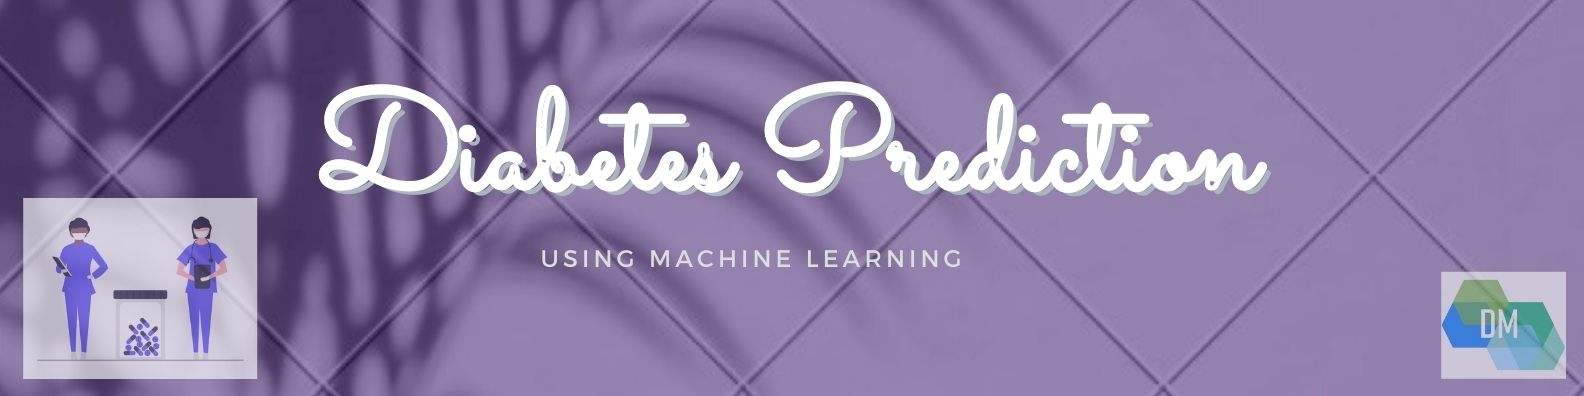

<blockquote>📌This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.</blockquote>

### <h3 style="background-color:#5e60ce;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [ ]:
# getting started with the model 
# importing required libraries/packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import math
from scipy.stats import norm, skew

import warnings 
warnings.filterwarnings('ignore')

### <h3 style="background-color:#5e60ce;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [ ]:
# Importing and Reading the Dataset
df_diab= pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

In [ ]:
df_diab_row_count, df_diab_column_count=df_diab.shape
print('Total number of rows:', df_diab_row_count)
print('Total number of columns:', df_diab_column_count)

In [ ]:
df_diab.describe().T

In [ ]:
df_diab.tail()

In [ ]:
df_diab.info()

### <h3 style="background-color:#5e60ce;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [ ]:
df_diab.isna().sum()

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(df_diab['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(df_diab['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(df_diab['BloodPressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(df_diab['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(df_diab['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(df_diab['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(df_diab['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(df_diab['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()

In [ ]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target = ['Outcome']

In [ ]:
df_diab[features] = df_diab[features].replace(0,np.NaN)

In [ ]:
df_diab.isna().sum()

In [ ]:
df_diab.head()

In [ ]:
import missingno as msno
msno.bar(df_diab)

In [ ]:
df_diab.isnull().sum()/len(df_diab)*100 

### <h3 style="background-color:#5e60ce;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Checking for outliers ✏️ </centre></strong></h3>

In [ ]:
bmi_outliers=df_diab[df_diab['BMI']>40]
bmi_outliers['BMI'].shape

In [ ]:
df_diab[df_diab['BMI']>40].describe()

In [ ]:
#replacing outlier entries with mean of bmi
df_diab["BMI"] = df_diab["BMI"].apply(lambda x: df_diab.BMI.mean() if x>40 else x)

In [ ]:
df_diab.BMI.replace(to_replace=np.nan,value=df_diab.BMI.mean(), inplace=True)
df_diab.Pregnancies.replace(to_replace=np.nan,value=df_diab.Pregnancies.mean(), inplace=True)
df_diab.Glucose.replace(to_replace=np.nan,value=df_diab.Glucose.mean(), inplace=True)
df_diab.BloodPressure.replace(to_replace=np.nan,value=df_diab.BloodPressure.mean(), inplace=True)
df_diab.SkinThickness.replace(to_replace=np.nan,value=df_diab.SkinThickness.mean(), inplace=True)
df_diab.Insulin.replace(to_replace=np.nan,value=df_diab.Insulin.mean(), inplace=True)

In [ ]:
df_diab.isna().sum()

### <h3 style="background-color:#5e60ce;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Data Exploration for the Dataset 🔍 </centre></strong></h3>

In [ ]:
labels = df_diab['Outcome'].value_counts().index.tolist()[:2]
values = df_diab['Outcome'].value_counts().tolist()[:2]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.05])])
fig.show()

In [ ]:
df_diab['Age'] = np.log1p(df_diab['Age'])
sns.distplot(df_diab['Age'], fit=norm,color='#f77f00');

In [ ]:
df_diab['DiabetesPedigreeFunction'] = np.log1p(df_diab['DiabetesPedigreeFunction'])
sns.distplot(df_diab['Age'], fit=norm,color='#240046');

In [ ]:
print ("Unique values are:\n",df_diab.nunique())

In [ ]:
sns.scatterplot(x = df_diab['Glucose'],y = df_diab['Age'],hue = "Outcome",data = df_diab,palette="ocean")

In [ ]:
sns.scatterplot(x = df_diab['Glucose'],y = df_diab['Insulin'],hue = "Outcome",data = df_diab,palette="ocean")
sns.jointplot('Glucose','Insulin',data = df_diab,kind='hex',palette="ocean")

In [ ]:
sns.pairplot(df_diab, hue='Outcome',palette="mako_r")

In [ ]:
plt.figure(figsize=(11,11))
corr=df_diab.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='bwr_r', robust=True, center=0,square=True, linewidths=.6)
plt.title('Correlation')
plt.show()

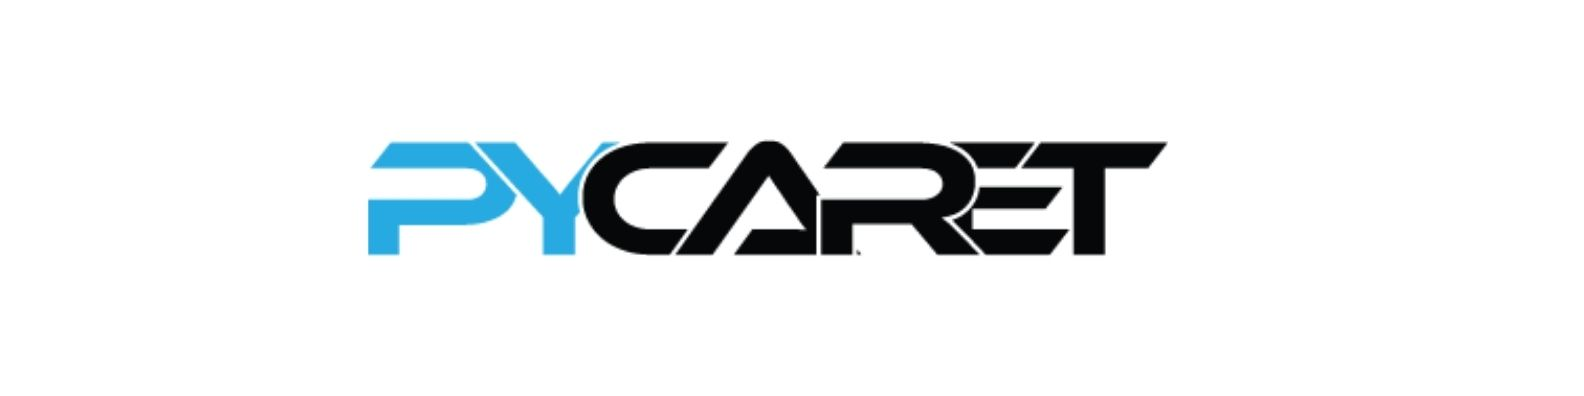

In [ ]:
pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
diab = setup(data = df_diab,target = 'Outcome',normalize=True, session_id=1)

In [ ]:
compare_models()

In [ ]:
rf = create_model('rf', fold = 10)

In [ ]:
tuned_rf = tune_model(rf)

In [ ]:
tuned_rf

In [ ]:
plot_model(tuned_rf, plot = 'error')

In [ ]:
evaluate_model(tuned_rf)

In [ ]:
plot_model(tuned_rf, plot = 'auc')

In [ ]:
plot_model(tuned_rf, plot = 'pr')

In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [ ]:
interpret_model(tuned_rf)

In [ ]:
predict_model(tuned_rf);

<blockquote>📌The tuned model with Random Forest Classifier is able to predict whether an individual has Diabetes or not with an accuracy of 82.68%.  

Details of the EDA and model setup are discussed in my article https://www.analyticsvidhya.com/blog/2021/07/diabetes-prediction-with-pycaret/ published on AnalyticsVidhya. </blockquote>